### Food Cereal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food = pd.read_csv('cereal.csv')
food.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Research Questions

- 1. What Products are rich in Carbohydrate, Protein, Vitamin & Mineral

- 2. Find products not suitbale for diabetic patients (above 60g)

- 3. Find products suitbale for diabetic patients (equal or below 60g)

- 4. Cereals with highest rating

### Assessment

> Information of the dataset

In [364]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


> Genreally there our data is clean 

> There are no null values and each feature have the correct datatypes

#### Research Question 1

1. What Products are rich in Carbohydrate, Protein, Vitamin & Mineral

> Crabohydrate Foods

> Define

>> Group food types that are of carbohydrate and plot distribution of top 5 and lowest 5 

In [434]:
carbo_foods = food[['name','carbo', 'sugars', 'fiber']]

In [435]:
carbo_foods

,name,carbo,sugars,fiber
0,100% Bran,5.0,6,10.0
1,100% Natural Bran,8.0,8,2.0
2,All-Bran,7.0,5,9.0
3,All-Bran with Extra Fiber,8.0,0,14.0
4,Almond Delight,14.0,8,1.0
...,...,...,...,...
72,Triples,21.0,3,0.0
73,Trix,13.0,12,0.0
74,Wheat Chex,17.0,3,3.0
75,Wheaties,17.0,3,3.0


> Sum up constituent of carbohydrates

In [438]:
carbo_foods['sum'] = carbo_foods.carbo + carbo_foods.sugars + carbo_foods.fiber

/home/patrick/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
carbo_foods

,name,carbo,sugars,fiber,sum
0,100% Bran,5.0,6,10.0,21.0
1,100% Natural Bran,8.0,8,2.0,18.0
2,All-Bran,7.0,5,9.0,21.0
3,All-Bran with Extra Fiber,8.0,0,14.0,22.0
4,Almond Delight,14.0,8,1.0,23.0
...,...,...,...,...,...
72,Triples,21.0,3,0.0,24.0
73,Trix,13.0,12,0.0,25.0
74,Wheat Chex,17.0,3,3.0,23.0
75,Wheaties,17.0,3,3.0,23.0


> melt features into one single column

In [510]:
carbo_foods2 = carbo_foods.copy()

In [511]:
carbo_foods2=carbo_foods2.melt(id_vars=['name', 'sum'], value_vars=['carbo', 'sugars', 'fiber'], var_name='Carbohydrates', value_name='grams')

In [512]:
carbo_foods2

,name,sum,Carbohydrates,grams
0,100% Bran,21.0,carbo,5.0
1,100% Natural Bran,18.0,carbo,8.0
2,All-Bran,21.0,carbo,7.0
3,All-Bran with Extra Fiber,22.0,carbo,8.0
4,Almond Delight,23.0,carbo,14.0
...,...,...,...,...
226,Triples,24.0,fiber,0.0
227,Trix,25.0,fiber,0.0
228,Wheat Chex,23.0,fiber,3.0
229,Wheaties,23.0,fiber,3.0


> Top 5 Carbo Cereals

In [513]:
carbo_foods2 =carbo_foods2.groupby(['name', 'Carbohydrates', 'sum', 'grams'])['grams'].sum()

In [514]:
carbo_foods2

name                 Carbohydrates  sum   grams
100% Bran            carbo          21.0  5.0       5.0
                     fiber          21.0  10.0     10.0
                     sugars         21.0  6.0       6.0
100% Natural Bran    carbo          18.0  8.0       8.0
                     fiber          18.0  2.0       2.0
                                                   ... 
Wheaties             fiber          23.0  3.0       3.0
                     sugars         23.0  3.0       3.0
Wheaties Honey Gold  carbo          25.0  16.0     16.0
                     fiber          25.0  1.0       1.0
                     sugars         25.0  8.0       8.0
Name: grams, Length: 231, dtype: float64

In [521]:
carbo_foods2= pd.DataFrame(carbo_foods2).sort_values(by='sum', ascending=False)

In [522]:
carbo_foods2

grams
name                 Carbohydrates sum  grams       
Total Raisin Bran    carbo         33.0  15.0   15.0
Mueslix Crispy Blend sugars        33.0  13.0   13.0
                     fiber         33.0  3.0     3.0
Total Raisin Bran    sugars        33.0  14.0   14.0
                     fiber         33.0  4.0     4.0
...                                              ...
Puffed Wheat         fiber         11.0  1.0     1.0
                     carbo         11.0  10.0   10.0
Quaker Oatmeal       sugars        0.7  -1.0    -1.0
                     fiber         0.7   2.7     2.7
                     carbo         0.7  -1.0    -1.0

[231 rows x 1 columns]

In [535]:
carbo_foods2.reset_index('name', 'Carbohydrates')

Index(['grams'], dtype='object')

In [485]:
top5_carbo = carbo_foods2.head(10)

In [449]:
top5_carbo

,name,Carbohydrates,grams
0,Rice Chex,carbo,23.0
1,Corn Chex,carbo,22.0
2,Rice Krispies,carbo,22.0
3,Crispix,carbo,21.0
4,Cream of Wheat (Quick),carbo,21.0
5,Nutri-Grain Almond-Raisin,carbo,21.0
6,Total Corn Flakes,carbo,21.0
7,Triples,carbo,21.0
8,Corn Flakes,carbo,21.0
9,Kix,carbo,21.0


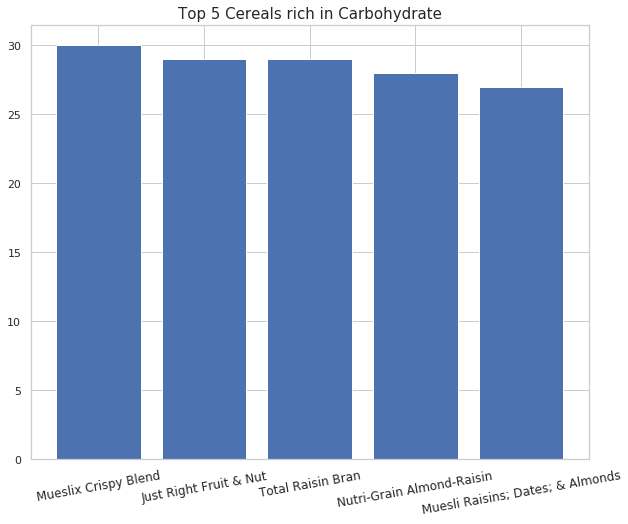

In [395]:
plt.subplots(figsize=(10, 8))
plt.bar(x=top5_carbo.name, height=top5_carbo.grams)
plt.title("Top 5 Cereals rich in Carbohydrate", fontsize=15)
plt.xticks(rotation=10, fontsize=12)
plt.show()

> Low 5 Carbo Foods

In [118]:
low5_carbo = pd.Series(carbo_foods2.groupby('name')['grams'].sum()).sort_values(ascending=False).reset_index().tail()

In [119]:
low5_carbo

,name,grams
72,All-Bran,12.0
73,100% Bran,11.0
74,Puffed Wheat,10.0
75,All-Bran with Extra Fiber,8.0
76,Quaker Oatmeal,-2.0


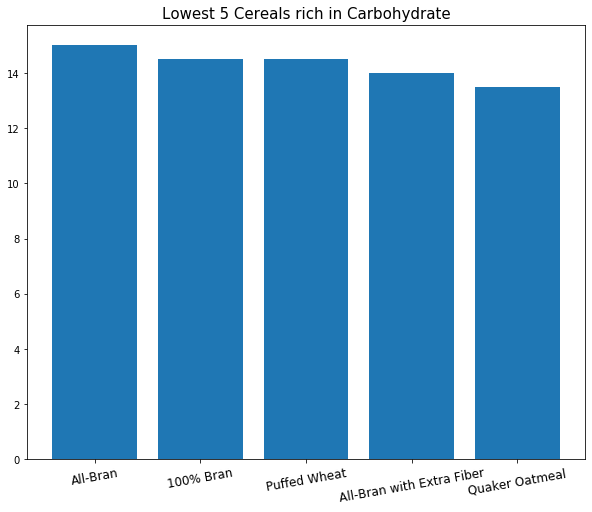

In [175]:
plt.subplots(figsize=(10, 8))
plt.bar(x=low5_carbo.name, height=top5_carbo.grams)
plt.title("Lowest 5 Cereals rich in Carbohydrate", fontsize=15)
plt.xticks(rotation=10, fontsize=12)
plt.show()

> Protein Foods

> Define

>> Group food types that are of protein and plot distribution of top 5 and lowest 5 

In [121]:
protein_foods = food[['name','protein' ]]

In [122]:
protein_foods

,name,protein
0,100% Bran,4
1,100% Natural Bran,3
2,All-Bran,4
3,All-Bran with Extra Fiber,4
4,Almond Delight,2
...,...,...
72,Triples,2
73,Trix,1
74,Wheat Chex,3
75,Wheaties,3


In [87]:
protein_foods2 = protein_foods.copy()

In [123]:
top5_protein = pd.Series(protein_foods2.groupby('name')['protein'].sum()).sort_values(ascending=False).reset_index().head()

In [124]:
top5_protein

,name,protein
0,Cheerios,6
1,Special K,6
2,Quaker Oatmeal,5
3,100% Bran,4
4,All-Bran,4


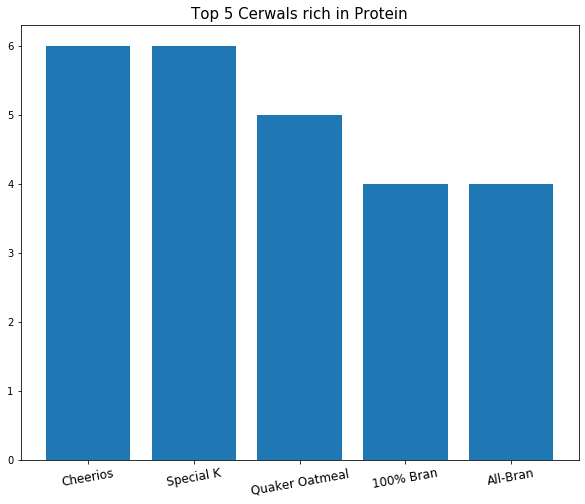

In [174]:
plt.subplots(figsize=(10, 8))
plt.bar(x=top5_protein.name, height=top5_protein.protein)
plt.title("Top 5 Cerwals rich in Protein", fontsize=15)
plt.xticks(rotation=10, fontsize=12)
plt.show()

In [126]:
low5_protein = pd.Series(protein_foods2.groupby('name')['protein'].sum()).sort_values(ascending=False).reset_index().tail()

In [127]:
low5_protein

,name,protein
72,Count Chocula,1
73,Honey-comb,1
74,Honey Graham Ohs,1
75,Golden Grahams,1
76,Puffed Rice,1


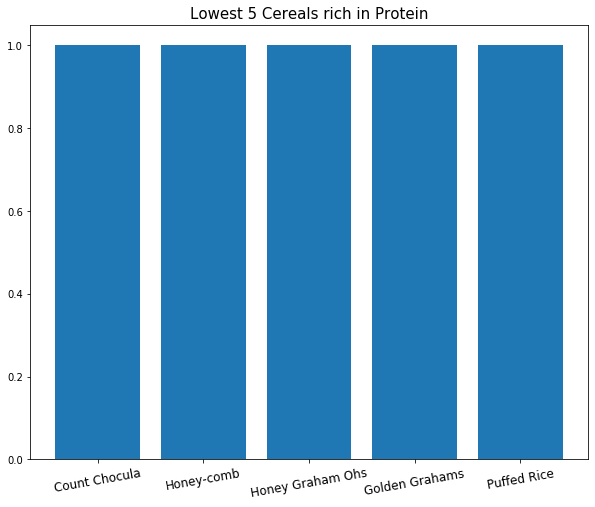

In [173]:
plt.subplots(figsize=(10, 8))
plt.bar(x=low5_protein.name, height=low5_protein.protein)
plt.title("Lowest 5 Cereals rich in Protein", fontsize=15)
plt.xticks(rotation=10, fontsize=12)
plt.show()

##### 

> Vitamin Foods

> Define

>> Foods that have are rich or lack in  vitamins

In [130]:
vitamin_foods = food[['name', 'vitamins' ]]

In [168]:
no_vitmain_foods = vitamin_foods.query('vitamins == 0') 

In [169]:
no_vitmain_foods

,name,vitamins
1,100% Natural Bran,0
20,Cream of Wheat (Quick),0
54,Puffed Rice,0
55,Puffed Wheat,0
57,Quaker Oatmeal,0
63,Shredded Wheat,0
64,Shredded Wheat 'n'Bran,0
65,Shredded Wheat spoon size,0


In [170]:
rich_vitmain_foods = vitamin_foods.query('vitamins == 100') 

In [171]:
rich_vitmain_foods

,name,vitamins
38,Just Right Crunchy Nuggets,100
39,Just Right Fruit & Nut,100
53,Product 19,100
69,Total Corn Flakes,100
70,Total Raisin Bran,100
71,Total Whole Grain,100


In [610]:
mineral_foods = food[['name', 'potass','sodium']]

> Mineral Foods

> Define

>> Top 5 Cereals and LOwest 5 Cereals rich in Minerals

> Add constituents of minerals

In [611]:
mineral_foods['sum'] = mineral_foods.potass + mineral_foods.sodium

/home/patrick/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [612]:
mineral_foods

,name,potass,sodium,sum
0,100% Bran,280,130,410
1,100% Natural Bran,135,15,150
2,All-Bran,320,260,580
3,All-Bran with Extra Fiber,330,140,470
4,Almond Delight,-1,200,199
...,...,...,...,...
72,Triples,60,250,310
73,Trix,25,140,165
74,Wheat Chex,115,230,345
75,Wheaties,110,200,310


> melt mineral columns

In [613]:
mineral_foods2 = mineral_foods.copy()

In [614]:
mineral_foods2 = mineral_foods2.melt(id_vars=['name', 'sum'], value_vars=['potass', 'sodium'], var_name='minerals', value_name='grams')

In [616]:
mineral_foods2

,name,sum,minerals,grams
0,100% Bran,410,potass,280
1,100% Natural Bran,150,potass,135
2,All-Bran,580,potass,320
3,All-Bran with Extra Fiber,470,potass,330
4,Almond Delight,199,potass,-1
...,...,...,...,...
149,Triples,310,sodium,250
150,Trix,165,sodium,140
151,Wheat Chex,345,sodium,230
152,Wheaties,310,sodium,200


In [617]:
mineral_foods2 =(mineral_foods2.groupby(['name', 'minerals', 'sum'])['grams'].sum()).reset_index()

In [618]:
mineral_foods2

,name,minerals,sum,grams
0,100% Bran,potass,410,280
1,100% Bran,sodium,410,130
2,100% Natural Bran,potass,150,135
3,100% Natural Bran,sodium,150,15
4,All-Bran,potass,580,320
...,...,...,...,...
149,Wheat Chex,sodium,345,230
150,Wheaties,potass,310,110
151,Wheaties,sodium,310,200
152,Wheaties Honey Gold,potass,260,60


In [621]:
mineral_foods2=pd.DataFrame(mineral_foods2).sort_values(by=['sum'], ascending=False) #= 

In [622]:
mineral_foods2

,name,minerals,sum,grams
4,All-Bran,potass,580,320
5,All-Bran,sodium,580,260
6,All-Bran with Extra Fiber,potass,470,330
7,All-Bran with Extra Fiber,sodium,470,140
104,Post Nat. Raisin Bran,potass,460,260
...,...,...,...,...
41,Cream of Wheat (Quick),sodium,79,80
111,Puffed Wheat,sodium,50,0
110,Puffed Wheat,potass,50,50
109,Puffed Rice,sodium,15,0


In [623]:
top5_minerals = mineral_foods2.head(10)

In [624]:
top5_minerals

,name,minerals,sum,grams
4,All-Bran,potass,580,320
5,All-Bran,sodium,580,260
6,All-Bran with Extra Fiber,potass,470,330
7,All-Bran with Extra Fiber,sodium,470,140
104,Post Nat. Raisin Bran,potass,460,260
105,Post Nat. Raisin Bran,sodium,460,200
117,Raisin Bran,sodium,450,210
116,Raisin Bran,potass,450,240
57,Fruitful Bran,sodium,430,240
56,Fruitful Bran,potass,430,190


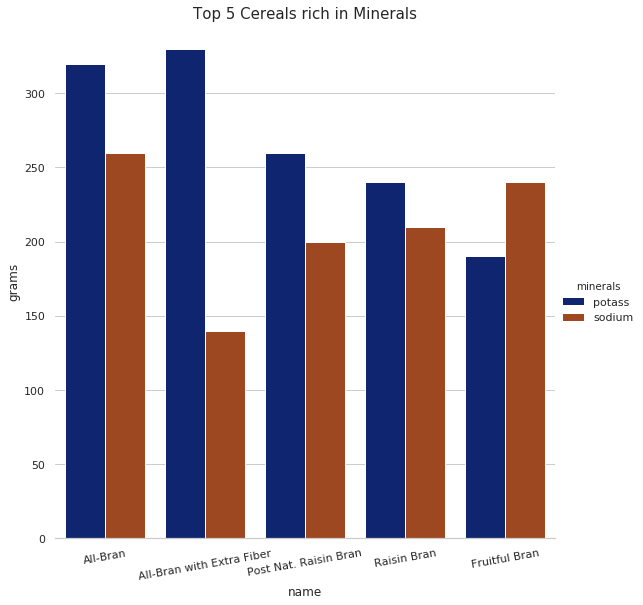

In [625]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'minerals',  data=top5_minerals,
           aspect=1, kind='bar', height=8, palette=["#001C7F", "#B1400D"])

plt.title('Top 5 Cereals rich in Minerals', fontsize=15)
plt.xticks(rotation=10)
plot.despine(left=True)
plt.show()

> Lowest 5 Minerals Cereals

In [626]:
low5_minerals = mineral_foods2.tail(10)

In [627]:
low5_minerals

,name,minerals,sum,grams
87,Maypo,sodium,95,0
86,Maypo,potass,95,95
61,Golden Crisp,sodium,85,45
60,Golden Crisp,potass,85,40
40,Cream of Wheat (Quick),potass,79,-1
41,Cream of Wheat (Quick),sodium,79,80
111,Puffed Wheat,sodium,50,0
110,Puffed Wheat,potass,50,50
109,Puffed Rice,sodium,15,0
108,Puffed Rice,potass,15,15


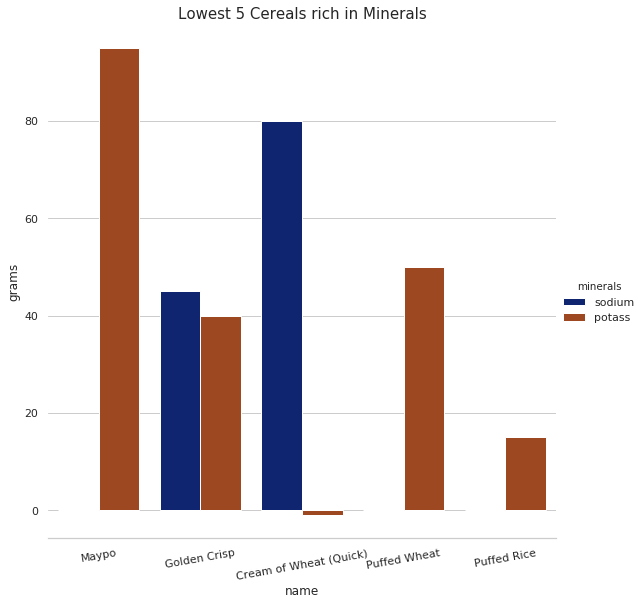

In [628]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'minerals',  data=low5_minerals,
           aspect=1, kind='bar', height=8, palette=["#001C7F", "#B1400D"])

plt.title('Lowest 5 Cereals rich in Minerals', fontsize=15)
plt.xticks(rotation=10)
plot.despine(left=True)
plt.show()